In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

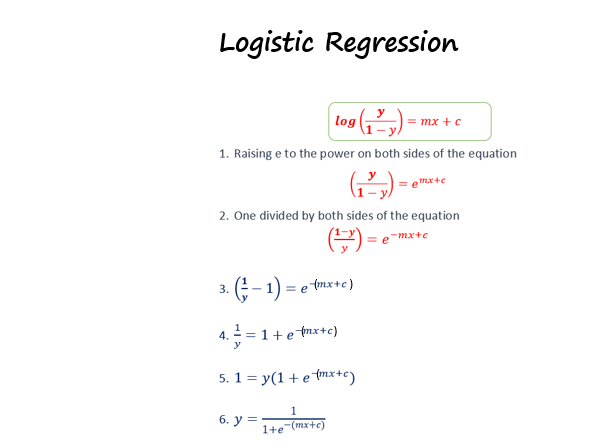

In [3]:
from IPython.display import Image
Image('log.jpg')

In [4]:
df = pd.read_excel('shoe.xlsx')

In [5]:
df.head()

size(cm) class(y)
0     9.500   Female
1    10.125     Male
2    10.410     Male
3     9.810   Female
4    11.050     Male

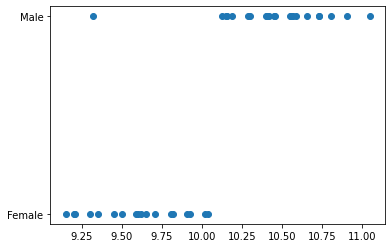

In [6]:
plt.scatter(df['size(cm)'],df['class(y)'])

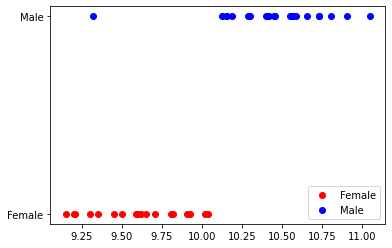

In [11]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')

plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')

plt.legend()

# Preprocessing

In [12]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [13]:
df.head()

size(cm)  class(y)
0     9.500         0
1    10.125         1
2    10.410         1
3     9.810         0
4    11.050         1

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
xtrain,xtest,ytrain,ytest = tts(df[['size(cm)']],df['class(y)'],test_size=0.3,random_state=55)

In [16]:
xtrain.head()

size(cm)
31      9.91
25     10.46
36      9.21
14     10.55
16     10.02

In [17]:
ytrain.head()

31    0
25    1
36    0
14    1
16    0
Name: class(y), dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
reg = LogisticRegression()

In [20]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
m = reg.coef_

In [22]:
m

array([[2.10745564]])

In [23]:
c = reg.intercept_
c

array([-20.81422921])

In [29]:
pred = reg.predict(xtest)

In [26]:
reg.predict_proba(xtest)

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

In [27]:
ytest.head()

22    0
3     0
2     1
38    0
6     0
Name: class(y), dtype: int64

In [28]:
Log_score = reg.score(xtest,ytest)
Log_score

0.9166666666666666

In [30]:
mae1 = mean_absolute_error(ytest,pred)

In [31]:
mae1

0.08333333333333333

In [32]:
mse1 = mean_squared_error(ytest,pred)
mse1

0.08333333333333333

In [38]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy'],
         'Accuracy':[mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data=data)

In [39]:
df_after_pred.head()

Name  Accuracy
0       Logistic_mae  0.083333
1       Logistic_mse  0.083333
2  Logistic_accuracy  0.916667

In [40]:
import seaborn as sns

<AxesSubplot:xlabel='Accuracy', ylabel='Name'>

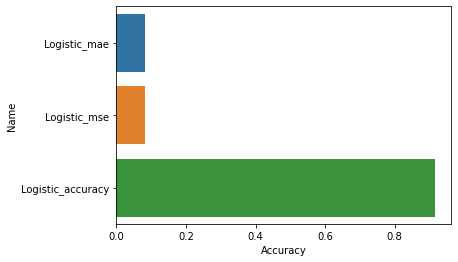

In [41]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)